###Desafio Cientista de dados


In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando dados
path = 'desafio_manutencao_preditiva_treino.csv'
pred_manu_data = pd.read_csv(path)

Descrição estatística dos valores númericos permite visualizar alguns aspectos dos dados, como média, desvio padrão, mediana e seus percentis. É interessante observar que média e mediana estão próximos, o que indica que a presença de Outliers não é tão densa. Isso pode ser mais explorado a frente.

In [3]:
pred_manu_data.describe()

,udi,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,4994.589921,299.992515,309.992620,1537.419529,40.058512,108.098095
std,2896.125718,1.994710,1.488101,177.182908,9.950804,63.359915
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,2496.500000,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,4983.000000,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,7510.500000,301.500000,311.100000,1612.000000,46.800000,162.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,251.000000


In [4]:
#Visualização de todos os nomes das colunas
pred_manu_data.columns

Index(['udi', 'product_id', 'type', 'air_temperature_k',
       'process_temperature_k', 'rotational_speed_rpm', 'torque_nm',
       'tool_wear_min', 'failure_type'],
      dtype='object')

In [5]:
pred_manu_data.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [6]:
#Avaliando quais os tipos de falha
pred_manu_data['failure_type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [8]:
#Checando por ausência de valores
pred_manu_data.isna().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

In [9]:
#Analisando se dados faltantes estão definidos como 0
for col in pred_manu_data.columns:
    column = pred_manu_data[col] 
    count = (column == 0).sum()
    print(col,count)

udi 0
product_id 0
type 0
air_temperature_k 0
process_temperature_k 0
rotational_speed_rpm 0
torque_nm 0
tool_wear_min 82
failure_type 0


Como se observa, há 82 casos na coluna "tool_wear_min", portanto é interessante uma investigação mais a fundo.

In [10]:
#Investigando os valores de tool_wear_min iguais a 0
no_wear = pred_manu_data.loc[pred_manu_data['tool_wear_min'] == 0]
no_wear.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
57,79,L47258,L,298.8,308.9,1398,51.5,0,No Failure
114,163,L47342,L,298.3,308.1,1586,35.5,0,No Failure
172,251,L47430,L,298.0,308.3,1662,32.7,0,No Failure
231,333,M15192,M,297.6,308.3,1538,40.2,0,No Failure


Nesse caso, é possível que isso se dê pelo fato das máquinas específicas terem sido usadas por pouco tempo, portanto não houve tempo suficiente para desgaste das ferramentas. 

Continuando a análise, é interessante ver a distribuição entre máquinas de baixa (L), média (M) e alta qualidade (H).

([<matplotlib.patches.Wedge at 0x1dbf61409a0>,
 [Text(-0.35064719612104434, 1.0426152424803936, 'L'),
  Text(0.01580853968500669, -1.0998863987126253, 'M'),
  Text(1.0475468192749062, -0.3356272656192089, 'H')],
 [Text(-0.19126210697511506, 0.5686992231711238, '60.33%'),
  Text(0.008622839828185467, -0.5999380356614319, '29.80%'),
  Text(0.5713891741499488, -0.18306941761047757, '9.87%')])

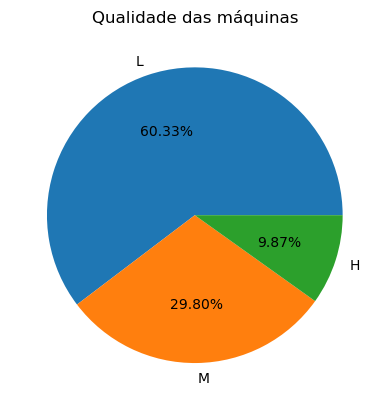

In [11]:
#Analisando dados
plt.title('Qualidade das máquinas')
plt.pie(pred_manu_data['type'].value_counts(), labels = pred_manu_data['type'].value_counts().index, autopct = '%.2f%%')

Com isso, observa-se que máquinas de baixa qualidade representam mais de 50% dos dados, portanto no modelo preditivo isso tem de ser bem distribuido, para não haver um viés para esse tipo de máquina.

A seguir, foi feita análise de correlação entre os dados.

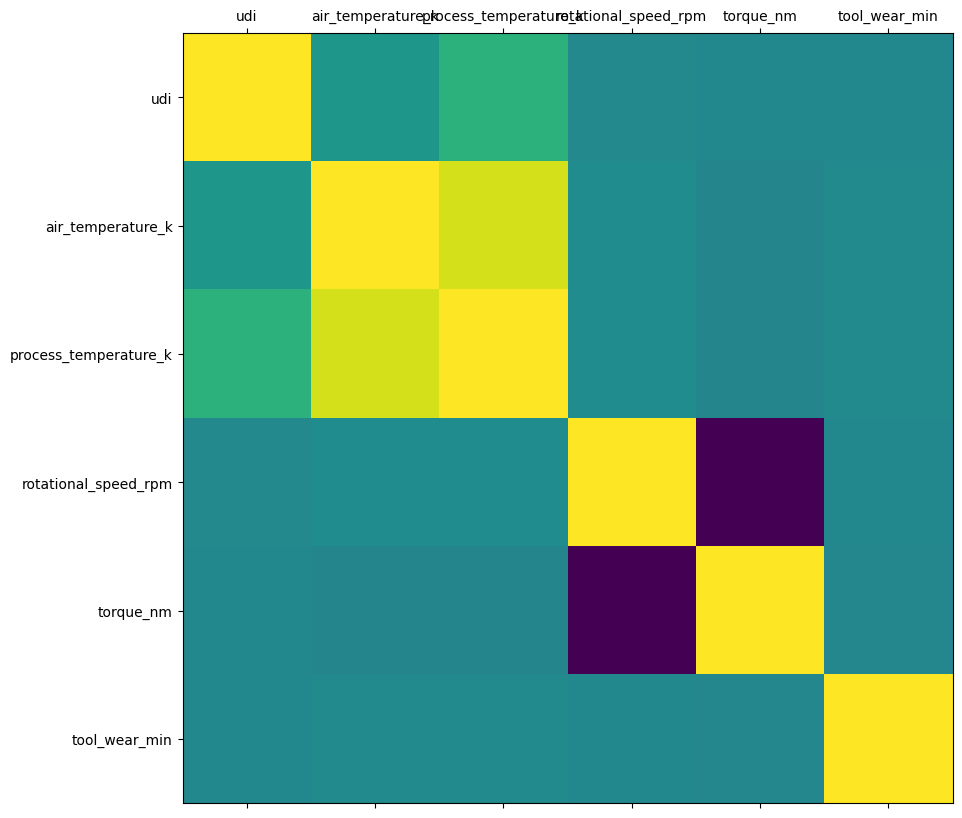

In [12]:
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
plot_corr(pred_manu_data)

Observa-se uma forte correlação positiva entre as temperaturas e forte correlação negativa entre torque e velocidade de rotação. Quanto aos outros dados, não há uma correlação (linear) significativa.  

Abaixo, foram feitas boxplots dos dados para avaliar a distribuição desses e buscar a presença de Outliers. No caso, apenas as colunas de torque e velocidade de rotação apresentaram Outliers, então uma investigação pode ser feita para avaliar se esses dados devem ser mantidos ou se podem prejudicar a análise preditiva.

<AxesSubplot:xlabel='type', ylabel='torque_nm'>

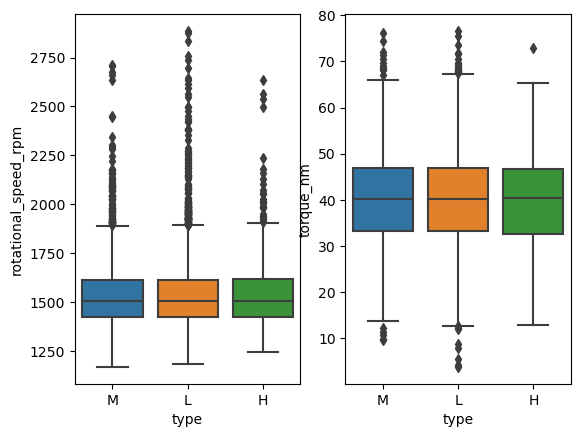

In [13]:
fig, axs = plt.subplots(ncols = 2)
sns.boxplot(x = 'type' , y = 'rotational_speed_rpm', data = pred_manu_data, ax = axs[0])
sns.boxplot(x = 'type' , y = 'torque_nm', data = pred_manu_data,ax = axs[1])

In [14]:
pred_manu_data.loc[(pred_manu_data['rotational_speed_rpm'] >= 1800),'failure_type'].value_counts()

No Failure           458
Power Failure         18
Tool Wear Failure      6
Name: failure_type, dtype: int64

In [15]:
print(pred_manu_data.loc[(pred_manu_data['torque_nm'] >= 65),'failure_type'].value_counts(), '\n')
print(pred_manu_data.loc[(pred_manu_data['torque_nm'] <= 15),'failure_type'].value_counts())

Power Failure               32
No Failure                   6
Overstrain Failure           6
Heat Dissipation Failure     1
Name: failure_type, dtype: int64 

No Failure       19
Power Failure    18
Name: failure_type, dtype: int64


Para comparação, os valores totais por tipo de falha

In [16]:
pred_manu_data['failure_type'].value_counts()

No Failure                  6435
Heat Dissipation Failure      75
Power Failure                 63
Overstrain Failure            52
Tool Wear Failure             30
Random Failures               12
Name: failure_type, dtype: int64

Com base nos dados, apesar de não ser tão representativo para os outros tipos de falha, remover esses valores poderia afetar a análise do tipo 'Power Failure', já que praticamente metade dos dados em que essa falha ocorre estão para torque maior que 65 NM, e outra parte também para torque menor que 15 NM, portanto não podem ser desprezados.


Após essa análise, foi feita análise de densidade (KDE Plots) dos dados restantes, para ver se há distribuição normal ou se haveria necessidade de um tratamento para corrigir assimetrias das distribuições.

<AxesSubplot:xlabel='process_temperature_k', ylabel='Density'>

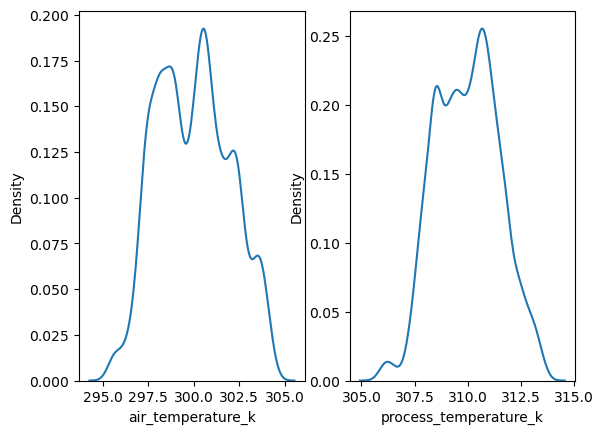

In [17]:
fig, axs = plt.subplots(ncols = 2)
sns.kdeplot(x = 'air_temperature_k', data = pred_manu_data,ax = axs[0])
sns.kdeplot(x = 'process_temperature_k', data = pred_manu_data, ax = axs[1])

<AxesSubplot:xlabel='torque_nm', ylabel='Density'>

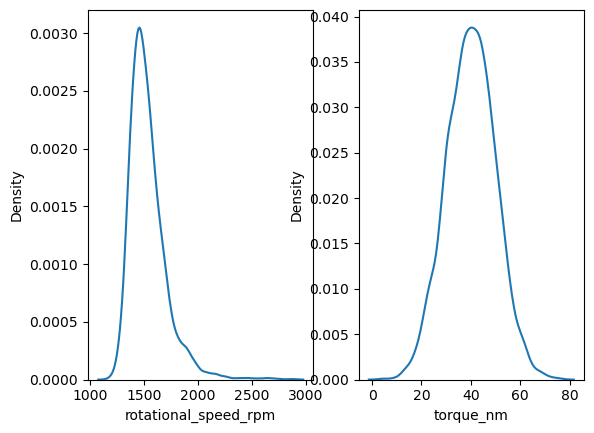

In [18]:
fig, axs = plt.subplots(ncols = 2)
sns.kdeplot(x = 'rotational_speed_rpm', data = pred_manu_data,ax = axs[0])
sns.kdeplot(x = 'torque_nm', data = pred_manu_data, ax = axs[1])

Como todos os dados seguem uma praticamente distribuição normal - ou gaussiana - não há necessidade de um tratamento logarítimico para correção. 

Abaixo, com base nos plots de correlação anteriores, foram analisadas as correlações entre as temperaturas e correlações entre torque e velocidade.

<AxesSubplot:xlabel='air_temperature_k', ylabel='process_temperature_k'>

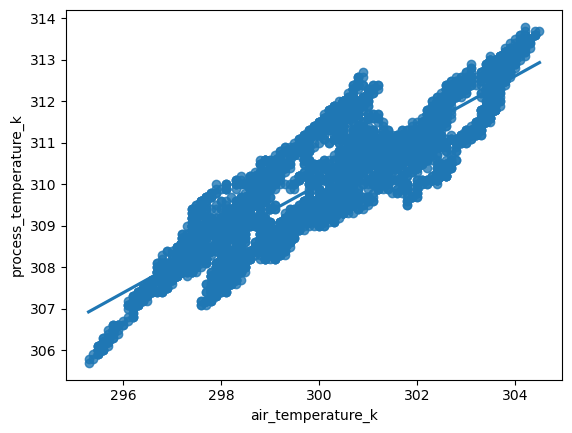

In [19]:

sns.regplot(data= pred_manu_data, x= 'air_temperature_k', y = 'process_temperature_k')


<AxesSubplot:xlabel='torque_nm', ylabel='rotational_speed_rpm'>

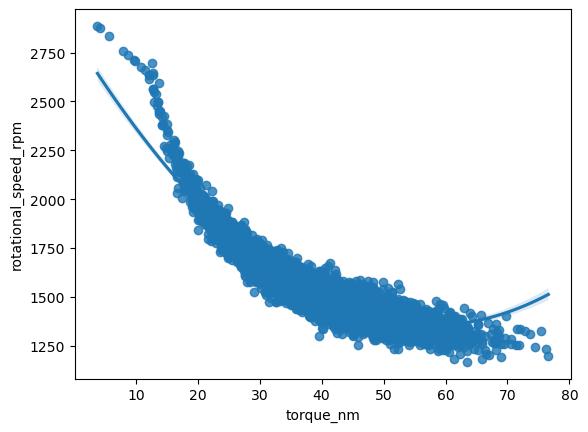

In [20]:
sns.regplot(data= pred_manu_data, x= 'torque_nm', y = 'rotational_speed_rpm',order = 2)

 Por fim, também foi analisado a distribuição de falhas por tipo de máquina.

In [21]:
by_type_fail = pred_manu_data.groupby(['failure_type','type'])['udi'].count()
by_type_fail = by_type_fail.reset_index(level=[0,1])
by_type_fail = by_type_fail.drop([3,4,5])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Heat Dissipation Failure'),
  Text(1, 0, 'Overstrain Failure'),
  Text(2, 0, 'Power Failure'),
  Text(3, 0, 'Random Failures'),
  Text(4, 0, 'Tool Wear Failure')])

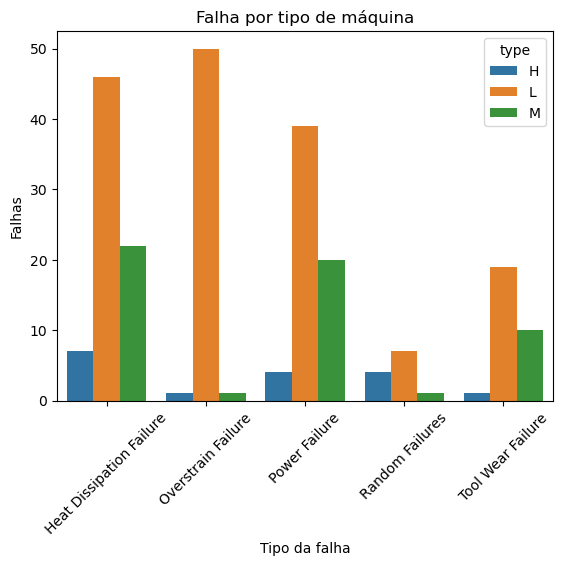

In [22]:
plt.title('Falha por tipo de máquina')

sns.barplot(x = 'failure_type' , y = 'udi',data = by_type_fail, hue = 'type')
plt.xlabel('Tipo da falha')
plt.ylabel('Falhas')
plt.xticks(rotation = 45)

Devido ao grande volume de dados para tipo L, é visível que esse domina as categorias de falha, mas também é interessante observar que as máquinas do tipo H apresentaram valor próximo de L para falhas aleatórias ao passo que tipo M quase não apresentam para essa mesma falha.

A descrição do banco de dados traz informações importantes sobre os tipos de falha que devem ser levados em conta, como no caso de falha por dissipação de calor (Heat Dissipation Failure) ocorrer com diferença entre temperaturas de 8.6 K e velocidade abaixo de 1380 rpm. Portanto, novas colunas podem ser criadas para auxiliar o modelo preditivo a reconhecer padrões.   

In [23]:
#Novas colunas
pred_manu_data['temp_grad'] = pred_manu_data['process_temperature_k'] - pred_manu_data['air_temperature_k']
pred_manu_data['pot'] = pred_manu_data['torque_nm']*(pred_manu_data['rotational_speed_rpm']*(2*np.pi)/60)
pred_manu_data['wear_N'] = pred_manu_data['tool_wear_min']*pred_manu_data['torque_nm']

pred_manu_data.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,temp_grad,pot,wear_N
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure,10.5,6951.590560,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure,10.5,6826.722724,138.9
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure,10.5,5897.816608,360.0
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure,10.5,6252.554779,460.9
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure,10.5,6917.703247,593.6


No que diz respeito aos dados disponíveis, para as variáveis serão removidas as colunas 'udi' e 'product_id', já para dados futuros podem existir outros tipos de máquina com IDs diferentes. 

In [24]:
pred_manu_data_2 = pred_manu_data.drop(['udi','product_id'],axis = 1)
pred_manu_data_2.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,temp_grad,pot,wear_N
0,M,298.1,308.6,1551,42.8,0,No Failure,10.5,6951.590560,0.0
1,L,298.2,308.7,1408,46.3,3,No Failure,10.5,6826.722724,138.9
2,L,298.2,308.7,1408,40.0,9,No Failure,10.5,5897.816608,360.0
3,M,298.1,308.6,1425,41.9,11,No Failure,10.5,6252.554779,460.9
4,L,298.1,308.6,1558,42.4,14,No Failure,10.5,6917.703247,593.6


Desse modo, com a análise finalizada, é preciso finalizar o tratamento das variáveis categóricas, no caso, 'type', e o tratamento da variável "target", no caso, 'failure_type'. na primeira será aplicada um 'One-Hotencoding', que irá criar uma coluna correspondente a cada tipo de máquina e irá associar 1 ou 0 para cada máquina correspondente, e para a segunda será aplicada 'label encoding', que associa cada classe única a um valor numérico. Isso é feito para que os modelos de ML possam trabalhar, já que não são capazes de trabalhar com dados categóricos. 


Uma aproximação para essa operação é separar os atributos em categóricos e numéricos, mas como neste caso só há duas colunas de valores categóricos, então não é necessário.

O Label Encoding será aplicado diretamente no DataFrame, e o One-Hot Encoding será aplicado apenas após separação dos dados em teste- validação.

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
l_e = LabelEncoder()
O_H = OneHotEncoder(sparse = False)
pred_labeled = pred_manu_data_2.copy()
pred_labeled['failure_type'] = l_e.fit_transform(label_pred['failure_type'].astype(object))
pred_labeled.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type,temp_grad,pot,wear_N
0,M,298.1,308.6,1551,42.8,0,1,10.5,6951.590560,0.0
1,L,298.2,308.7,1408,46.3,3,1,10.5,6826.722724,138.9
2,L,298.2,308.7,1408,40.0,9,1,10.5,5897.816608,360.0
3,M,298.1,308.6,1425,41.9,11,1,10.5,6252.554779,460.9
4,L,298.1,308.6,1558,42.4,14,1,10.5,6917.703247,593.6


In [38]:
#Separando os dados para split
X = pred_labeled.copy()
y = X.pop('failure_type')

X.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N
0,M,298.1,308.6,1551,42.8,0,10.5,6951.590560,0.0
1,L,298.2,308.7,1408,46.3,3,10.5,6826.722724,138.9
2,L,298.2,308.7,1408,40.0,9,10.5,5897.816608,360.0
3,M,298.1,308.6,1425,41.9,11,10.5,6252.554779,460.9
4,L,298.1,308.6,1558,42.4,14,10.5,6917.703247,593.6


In [39]:
#Separação dos dados entre treino e validação
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                                random_state=42)

In [54]:
#Aplicando OH

OH_cols_train = pd.DataFrame(O_H.fit_transform(X_train['type'].values.reshape(-1, 1)))
OH_cols_valid = pd.DataFrame(O_H.transform(X_valid['type'].values.reshape(-1, 1)))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

OH_cols_train.columns = O_H.get_feature_names_out()
OH_cols_valid.columns = O_H.get_feature_names_out()

num_X_train = X_train.drop('type', axis=1)
num_X_valid = X_valid.drop('type', axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.head()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N,x0_H,x0_L,x0_M
5119,300.7,311.5,1441,40.6,33,10.8,6126.587385,1339.8,0.0,0.0,1.0
1684,298.9,308.6,1425,49.6,35,9.7,7401.592292,1736.0,0.0,0.0,1.0
1586,299.2,308.4,1476,32.7,101,9.2,5054.319925,3302.7,0.0,0.0,1.0
5091,300.4,311.4,1728,31.7,133,11.0,5736.296858,4216.1,0.0,1.0,0.0
1338,298.3,308.0,1451,47.1,196,9.7,7156.767976,9231.6,0.0,1.0,0.0


Com a parte de operações nos dados aplicada, agora resta a definição do modelo preditivo. 
Este caso se trata de um caso de classificação, já que temos 6 classificações diferentes: sem falha, falha por desgaste da ferramenta (TWF), falha por dissipação de calor (HDF), falha por potência (PWF), falha por esforço excessivo (OSF) e falha aleatória (RNF). 
Como cada falha é uma classe única, é então um problema de classificação de multiclasse - ou multiclass classification.

Desse modo, aqui será utilizado um modelo de classificação. A princípio, serão comparados três modelos: KNNClassifier,DecisionTreeClassifier e Naive Bayes.

O KNN - ou k-Nearest Neighbors - é modelo simples, funciona bem com dados que possuem muito ruído, mas que tem alta demanda computacional se comparado a outros modelos. É bem aplicado em reconhecimento de imagens.

O DecisionTreeClassifier é um algoritmo do tipo Árvore de Classificação, com cada nó da árvore denotando um atributo e cada folha denota uma classe. Requer menos pré-processamento de dados que outros modelos, não requerindo normalização dos dados e ausência de dados não afeta a construção da árvore, porém mudanças nos dados podem levar a mudanças na construção da árvore, causando instabilidades, e pode requerer mais tempo para treinar o modelo, o que em certos casos se torna inviável dada a urgência dos processos.

O Naive Bayes é um modelo que utiliza o Teorema de Bayes, que diz que a presença de um atributo particular em uma classe não afeta a presença de outra. Mesmo que todos os atributos precisem um do outro para existir, todas contribuem de maneira independente. É um algoritmo rápido, bem utilizado para problemas de classificação multiclasse, requerindo menos dados de treino que outros modelos, contudo sua suposição de que todos os atributos são independentes raramente é verdadeiro, o que limita seu uso em aplicações reais.

Observando essas descrições, o modelo utilizado aqui será o Naive Bayes, devido a sua boa aplicação em problemas multiclasse, velocidade e demandar menos volume de dados.

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


Com relação ao critério, será usado o Accuracy Score, sendo de mais fácil visualização que uma matriz de confusão, considerando a quantidade de variáveis de saída possíveis. Caso fosse um problema de classificação binário, o uso de matriz de confusão seria mais interessante.

In [67]:
#Análise do NaiveBayes
my_model= GaussianNB()
my_model.fit(OH_X_train,y_train)
predictions = my_model.predict(OH_X_valid)
score = accuracy_score(predictions,y_valid)
print(score)

0.9490254872563718


O modelo apresenta acurácia de 94%, um bom resultado, portanto pode-se partir para aplicar o modelo nos dados de teste.

In [76]:
#Recebendo dados de teste
pred_manu_test = pd.read_csv('desafio_manutencao_preditiva_teste.csv')
pred_manu_test.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
0,446,L47625,L,297.5,308.6,1793,26.7,70
1,7076,L54255,L,300.7,310.5,1536,47.4,192
2,1191,L48370,L,297.2,308.4,1460,42.1,41
3,2618,L49797,L,299.4,309.1,1670,35.9,68
4,5067,L52246,L,304.1,313.1,1550,30.9,9


In [77]:
#Tratando dados de teste
pred_manu_test['temp_grad'] = pred_manu_test['process_temperature_k'] - pred_manu_test['air_temperature_k']
pred_manu_test['pot'] = pred_manu_test['torque_nm']*(pred_manu_test['rotational_speed_rpm']*(2*np.pi)/60)
pred_manu_test['wear_N'] = pred_manu_test['tool_wear_min']*pred_manu_test['torque_nm']

pred_manu_test.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N
0,446,L47625,L,297.5,308.6,1793,26.7,70,11.1,5013.259309,1869.0
1,7076,L54255,L,300.7,310.5,1536,47.4,192,9.8,7624.268379,9100.8
2,1191,L48370,L,297.2,308.4,1460,42.1,41,11.2,6436.704468,1726.1
3,2618,L49797,L,299.4,309.1,1670,35.9,68,9.7,6278.263479,2441.2
4,5067,L52246,L,304.1,313.1,1550,30.9,9,9.0,5015.552671,278.1


In [78]:
pred_manu_test = pred_manu_test.drop(['udi','product_id'],axis = 1)
pred_manu_test.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N
0,L,297.5,308.6,1793,26.7,70,11.1,5013.259309,1869.0
1,L,300.7,310.5,1536,47.4,192,9.8,7624.268379,9100.8
2,L,297.2,308.4,1460,42.1,41,11.2,6436.704468,1726.1
3,L,299.4,309.1,1670,35.9,68,9.7,6278.263479,2441.2
4,L,304.1,313.1,1550,30.9,9,9.0,5015.552671,278.1


In [80]:
X_test = pred_manu_test.copy()
X_test.head()

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N
0,L,297.5,308.6,1793,26.7,70,11.1,5013.259309,1869.0
1,L,300.7,310.5,1536,47.4,192,9.8,7624.268379,9100.8
2,L,297.2,308.4,1460,42.1,41,11.2,6436.704468,1726.1
3,L,299.4,309.1,1670,35.9,68,9.7,6278.263479,2441.2
4,L,304.1,313.1,1550,30.9,9,9.0,5015.552671,278.1


In [81]:
OH_cols_test = pd.DataFrame(O_H.fit_transform(X_test['type'].values.reshape(-1, 1)))

OH_cols_test.index = X_test.index

OH_cols_test.columns = O_H.get_feature_names_out()

num_X_test = X_test.drop('type', axis=1)

OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

OH_X_test.head()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,temp_grad,pot,wear_N,x0_H,x0_L,x0_M
0,297.5,308.6,1793,26.7,70,11.1,5013.259309,1869.0,0.0,1.0,0.0
1,300.7,310.5,1536,47.4,192,9.8,7624.268379,9100.8,0.0,1.0,0.0
2,297.2,308.4,1460,42.1,41,11.2,6436.704468,1726.1,0.0,1.0,0.0
3,299.4,309.1,1670,35.9,68,9.7,6278.263479,2441.2,0.0,1.0,0.0
4,304.1,313.1,1550,30.9,9,9.0,5015.552671,278.1,0.0,1.0,0.0


In [82]:
test_predictions = my_model.predict(OH_X_test)

In [101]:
#Exportando resultados
predicted = pd.DataFrame(test_predictions,)
predicted['rowNumber'] = predicted.index
predicted.columns = ['predictedValues','rowNumber']
predicted = predicted.reindex(['rowNumber','predictedValues'], axis=1)
predicted.to_csv('predicted.csv')